## preprocessing
### 김하연

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [51]:
bus_df = pd.read_csv('data.csv',encoding='cp949')
y_bus_df = bus_df['nextStTm']
X_bus_df= bus_df.drop('nextStTm',axis=1)

# X_bus_df = transform_features(X_bus_df)
X_bus_df

,plainNo,dataTm,busType,fullSectDist,isFullFlag,trnstnid,vehId,islastyn,isrunyn,lastStnId,nextStId,lastStTm,rtDist,sectDist,sectOrd,sectionId,stopFlag,congetion,gpsX,gpsY
0,서울74사2506,20210811095541,1,0.981,0,121000986,113062090,0,1,113000020,113000026,12379,55.28,0.043,1,113600767,0,0,126.880282,37.577746
1,서울74사1363,20210811095548,1,0.364,0,121000986,113062102,0,1,113000204,111000005,11873,55.28,0.120,5,113604856,0,0,126.888812,37.579311
2,서울75사1366,20210811095545,0,0.794,0,121000986,113062131,0,1,111000005,111000007,11435,55.28,0.219,10,111600004,0,0,126.895163,37.582246
3,서울74사4110,20210811095552,1,0.825,0,121000986,113062335,0,1,112000008,112000014,10759,55.28,0.529,16,112602251,0,3,126.929481,37.564210
4,서울74사2432,20210811095548,1,2.201,0,121000986,113062162,0,1,112000016,112000050,10333,55.28,0.481,20,112603553,0,3,126.945698,37.564674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71662,서울70사6587,20210816135655,1,1.370,0,121000986,113062078,0,1,121000016,101000002,3339,55.28,0.100,61,121607076,0,3,127.020477,37.513484
71663,서울74사6205,20210816135511,1,3.317,0,121000986,113062062,0,1,102000068,101000002,2887,55.28,1.422,64,101604644,0,3,127.002644,37.541475
71664,서울74사5459,20210816135649,0,0.070,0,121000986,113062380,0,1,112000438,112000017,1632,55.28,0.000,74,112603901,1,3,126.960256,37.572137
71665,서울74사4605,20210816135655,0,1.819,0,121000986,113062130,0,1,112000187,112000017,1603,55.28,1.574,75,112603446,0,3,126.945883,37.565236


In [52]:
X_bus_df.drop(['plainNo'],axis=1,inplace=True)

In [53]:
X_bus_df.head(1)

,dataTm,busType,fullSectDist,isFullFlag,trnstnid,vehId,islastyn,isrunyn,lastStnId,nextStId,lastStTm,rtDist,sectDist,sectOrd,sectionId,stopFlag,congetion,gpsX,gpsY
0,20210811095541,1,0.981,0,121000986,113062090,0,1,113000020,113000026,12379,55.28,0.043,1,113600767,0,0,126.880282,37.577746


In [54]:
X_bus_df['dataTm']=X_bus_df['dataTm'].astype(str)

In [55]:
X_bus_df['dataTm']= X_bus_df['dataTm'].str[8:12]

In [56]:
X_bus_df.head(1)

,dataTm,busType,fullSectDist,isFullFlag,trnstnid,vehId,islastyn,isrunyn,lastStnId,nextStId,lastStTm,rtDist,sectDist,sectOrd,sectionId,stopFlag,congetion,gpsX,gpsY
0,0955,1,0.981,0,121000986,113062090,0,1,113000020,113000026,12379,55.28,0.043,1,113600767,0,0,126.880282,37.577746


In [57]:
X_bus_df['dataTm']=X_bus_df['dataTm'].apply(pd.to_numeric)

In [58]:
bus_df['dataTm']=bus_df['dataTm'].astype(str)

In [59]:
bus_df.columns

Index(['plainNo', 'dataTm', 'busType', 'fullSectDist', 'isFullFlag',
       'trnstnid', 'vehId', 'islastyn', 'isrunyn', 'lastStnId', 'nextStId',
       'lastStTm', 'rtDist', 'sectDist', 'sectOrd', 'sectionId', 'stopFlag',
       'congetion', 'gpsX', 'gpsY', 'nextStTm'],
      dtype='object')

In [71]:
%matplotlib inline

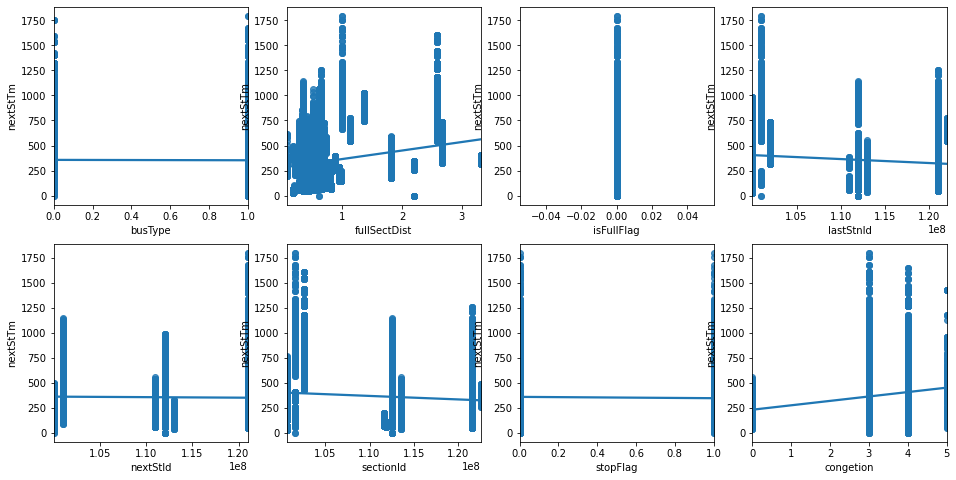

In [72]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['busType', 'fullSectDist', 'isFullFlag',
       'lastStnId', 'nextStId',
        'sectionId', 'stopFlag',
       'congetion']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='nextStTm',data=bus_df , ax=axs[row][col])

## MinMaxScaler

In [61]:
bus_df=bus_df.drop({'plainNo'},axis=1)

In [62]:
bus_df.columns

Index(['dataTm', 'busType', 'fullSectDist', 'isFullFlag', 'trnstnid', 'vehId',
       'islastyn', 'isrunyn', 'lastStnId', 'nextStId', 'lastStTm', 'rtDist',
       'sectDist', 'sectOrd', 'sectionId', 'stopFlag', 'congetion', 'gpsX',
       'gpsY', 'nextStTm'],
      dtype='object')

In [63]:
# bus_df.info()

bus_df['rtDist'].head(10)

0    55.28
1    55.28
2    55.28
3    55.28
4    55.28
5    55.28
6    55.28
7    55.28
8    55.28
9    55.28
Name: rtDist, dtype: float64

In [64]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(bus_df)
bus_scaled = scaler.transform(bus_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
bus_df_scaled = pd.DataFrame(data=bus_scaled, columns=bus_df.columns)
print('feature들의 최소 값')
print(bus_df_scaled.min())
print('\nfeature들의 최대 값')
print(bus_df_scaled.max())

feature들의 최소 값
dataTm          0.0
busType         0.0
fullSectDist    0.0
isFullFlag      0.0
trnstnid        0.0
vehId           0.0
islastyn        0.0
isrunyn         0.0
lastStnId       0.0
nextStId        0.0
lastStTm        0.0
rtDist          0.0
sectDist        0.0
sectOrd         0.0
sectionId       0.0
stopFlag        0.0
congetion       0.0
gpsX            0.0
gpsY            0.0
nextStTm        0.0
dtype: float64

feature들의 최대 값
dataTm          1.0
busType         1.0
fullSectDist    1.0
isFullFlag      0.0
trnstnid        0.0
vehId           1.0
islastyn        0.0
isrunyn         0.0
lastStnId       1.0
nextStId        1.0
lastStTm        1.0
rtDist          0.0
sectDist        1.0
sectOrd         1.0
sectionId       1.0
stopFlag        1.0
congetion       1.0
gpsX            1.0
gpsY            1.0
nextStTm        1.0
dtype: float64


In [65]:
# # 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
# fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
# lm_features = ['busType', 'fullSectDist', 'isFullFlag',
#        'lastStnId', 'nextStId',
#         'sectionId', 'stopFlag',
#        'congetion']
# for i , feature in enumerate(lm_features):
#     row = int(i/4)
#     col = i%4
#     # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
#     sns.regplot(x=feature , y='nextStTm',data=bus_df , ax=axs[row][col])
#     plt.show()

## 일정하게 nextStTm을 보내진 않는듯 하다.

#### 분단위로 dataTm을 만드니, 동일한 dataTm값이 많아졌고,
#### 머신러닝에서는 restStTm 값도 평균값으로 계산되서 MAE값이 많이 낮아진듯. 55분이면 한 값의 평균을 지칭 = 범위가 광범위

### ----------------------------------------------------------------------------

#### 1. dataTm에서 일의 자리수 초까지 다 살리고, nextStTm에서 일의 자리 초 삭제하거나
#### 2. dataTm에서 십의 자리수 초까지만 살리고 nextStTm에서 일의 자리 초를 삭제.

In [74]:
bus_df[bus_df['dataTm'].str.contains('202108110955')].head()

,dataTm,busType,fullSectDist,isFullFlag,trnstnid,vehId,islastyn,isrunyn,lastStnId,nextStId,lastStTm,rtDist,sectDist,sectOrd,sectionId,stopFlag,congetion,gpsX,gpsY,nextStTm
0,20210811095541,1,0.981,0,121000986,113062090,0,1,113000020,113000026,12379,55.28,0.043,1,113600767,0,0,126.880282,37.577746,172
1,20210811095548,1,0.364,0,121000986,113062102,0,1,113000204,111000005,11873,55.28,0.120,5,113604856,0,0,126.888812,37.579311,447
2,20210811095545,0,0.794,0,121000986,113062131,0,1,111000005,111000007,11435,55.28,0.219,10,111600004,0,0,126.895163,37.582246,135
3,20210811095552,1,0.825,0,121000986,113062335,0,1,112000008,112000014,10759,55.28,0.529,16,112602251,0,3,126.929481,37.564210,303
4,20210811095548,1,2.201,0,121000986,113062162,0,1,112000016,112000050,10333,55.28,0.481,20,112603553,0,3,126.945698,37.564674,329


In [75]:
bus_df[bus_df['dataTm'].str.contains('202108110955')]['nextStTm']

0     172
1     447
2     135
3     303
4     329
5     609
6     159
7     794
8     491
9     530
10    159
11    349
12     82
13    476
14     59
15    201
16    111
17    159
18    875
19    224
20    265
21    211
22     78
23    248
24     99
25    100
26    100
40    476
Name: nextStTm, dtype: int64

# 1. dateTm 분단위로 변경 

In [76]:
# y = home_data.SalePrice

# features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# X = home_data[features]
# X.head()

train_X, val_X, train_y, val_y = train_test_split(X_bus_df, y_bus_df, random_state=1)


rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.4f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 9.1655


# 2. y - nextStTm 분단위로 변경 

In [77]:
y_bus_df=y_bus_df.astype(str)

In [78]:
# y_bus_df =
y_bus_df=y_bus_df.str[:-1]

In [79]:
y_bus_df.str[:]

0        17
1        44
2        13
3        30
4        32
         ..
71662    79
71663    33
71664    27
71665    24
71666     9
Name: nextStTm, Length: 71667, dtype: object

In [80]:
y_bus_df=y_bus_df.apply(pd.to_numeric)

In [81]:
y_bus_df=y_bus_df.fillna(y_bus_df.mean())

In [82]:
y_bus_df.isnull().sum()

0

In [83]:
train_X, val_X, train_y, val_y = train_test_split(X_bus_df, y_bus_df, random_state=1)


rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.4f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.9360


In [84]:
# 교차검증

In [ ]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_bus_df, y_bus_df, scoring ='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative Mse scores:', np.round(neg_mse_scores,3))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores,3))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

## 검증 및 보완

### 1. 시간 분단위로 수정.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lm_features=['islastyn','isrunyn','lastStnId','nextStId','lastStTm','rtDist','sectDist','sectOrd']

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

## 릿지결과 - RMSE값이 크다.

In [ ]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_bus_df, y_bus_df, scoring ='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative Mse scores:', np.round(neg_mse_scores,3))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores,3))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score

In [ ]:
# def true_fun(X):
#     return np.cos(1.5 * np.pi * X)

# # X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 입니다.  
# np.random.seed(0)
# n_samples = 30
# X = np.sort(np.random.rand(n_samples))

# # y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
# y = true_fun(X) + np.random.randn(n_samples) * 0.1